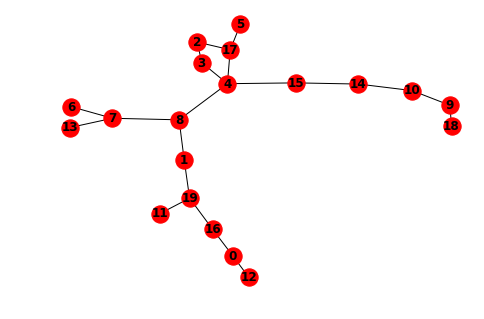

In [7]:
import networkx as nx
from utils import *
import matplotlib.pyplot as plt
import random



num_nodes = 20

# G = nx.Graph()
G = nx.connected_watts_strogatz_graph(num_nodes, 2, 0.8)


# nodes = [i for i in range(1, 8)]
# edges = [(1, 2), (1, 3),(2, 4), (3, 4), (4, 6), (5, 6), (5, 7), (6, 7)]

# G.add_nodes_from(nodes)
# G.add_edges_from(edges)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [8]:
valuations = {}
for i in range(len(G.nodes)):
    valuations[i] = {"valuation": random.randint(0, 100)}

valuations[0] = {"valuation": 0}
print(valuations)
nx.set_node_attributes(G, valuations)

{0: {'valuation': 0}, 1: {'valuation': 17}, 2: {'valuation': 18}, 3: {'valuation': 50}, 4: {'valuation': 61}, 5: {'valuation': 20}, 6: {'valuation': 52}, 7: {'valuation': 55}, 8: {'valuation': 16}, 9: {'valuation': 68}, 10: {'valuation': 9}, 11: {'valuation': 0}, 12: {'valuation': 25}, 13: {'valuation': 48}, 14: {'valuation': 0}, 15: {'valuation': 77}, 16: {'valuation': 57}, 17: {'valuation': 35}, 18: {'valuation': 52}, 19: {'valuation': 40}}


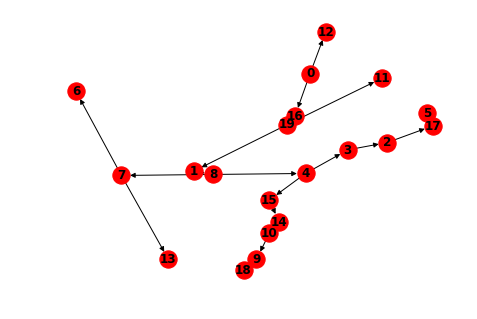

C:  [0, 15, 1, 4, 8, 16, 19]
w:  15
analysis:  1


In [9]:
dfs_tree = nx.dfs_tree(G, source=0)
nx.draw(dfs_tree, with_labels=True, font_weight='bold')
plt.show()

w = get_w(valuations)
C = get_C(G, w)




print('C: ', C)
print('w: ', w)
print('analysis: ', analysis(G, C, w))
    



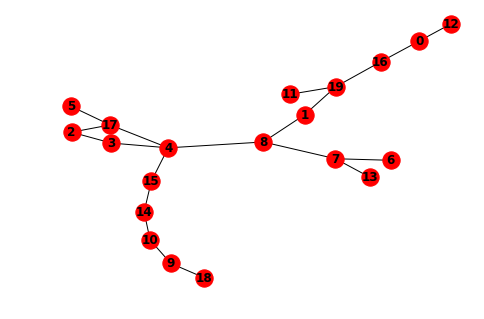

In [10]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

{3, 7, 11, 12, 14, 17}
[0, 15, 1, 4, 8, 16, 19]


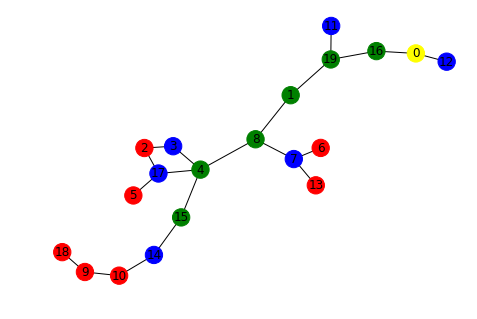

In [11]:
exposed = set()

for i in C:
    for n in G.neighbors(i):
        if n not in exposed and n not in C:
            exposed.add(n)
            
print(exposed)
    



print(C)
color_map = []
for i in G.nodes:
    
    if i == 0:
        color_map.append('yellow')
        continue
        
    if i in C:
        color_map.append('green')
    elif i in exposed:
        color_map.append('blue')
    else:
        color_map.append('red')

nx.draw(G, node_color=color_map, with_labels=True)

In [12]:


p = get_payments(G, C, w)


    
a = get_allocation(G, C, p)
print(a)
print(p)



final_p = get_final_payments(G, C, a, p)
print(final_p)

{0: 0, 16: 1}
{(16, 0): 25, (19, 16): 57, (1, 19): 57, (8, 1): 57, (4, 8): 57, (15, 4): 61}
{(16, 0): 25}
